<a href="https://colab.research.google.com/github/DuaneHsa/2022_ML_Earth_Env_Sci/blob/main/S3_2_Decision_Trees_reno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2: Training and Fine-Tuning a Decision Tree for the Moons Dataset

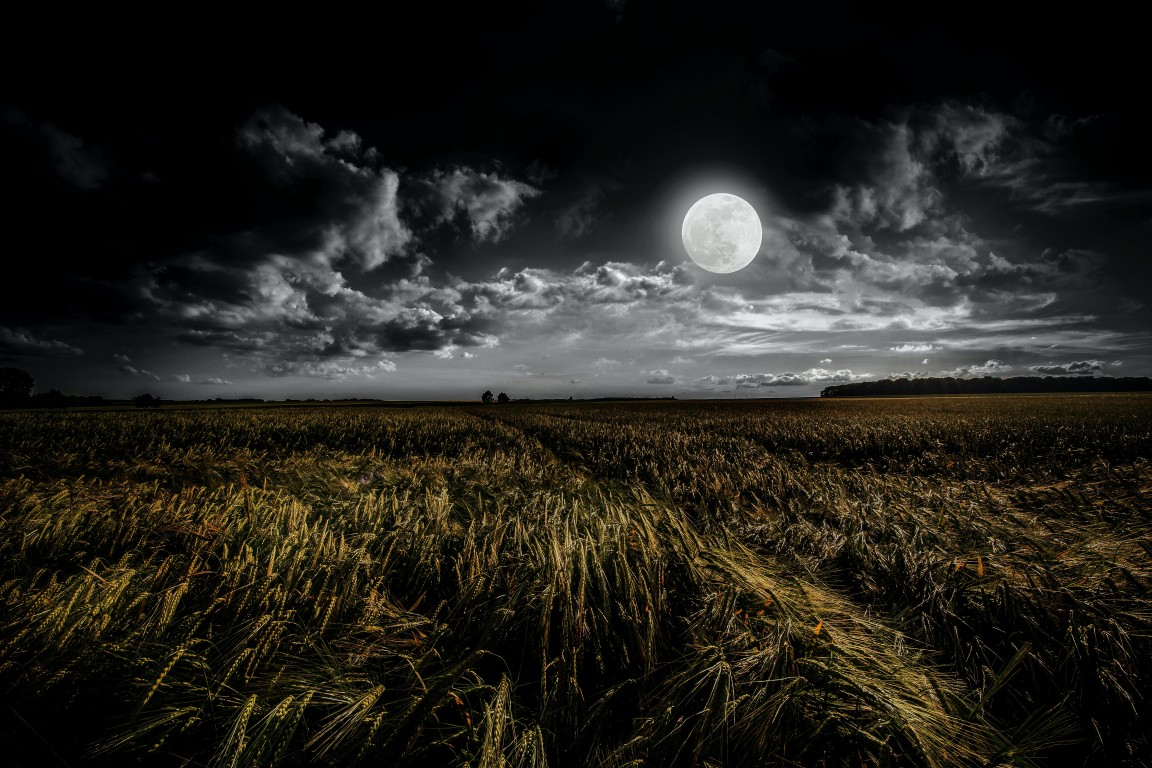

Can we grow a tree to predict the moon? 🌳 🌛

The goal of this exercise is to train and adjust the hyperparameters of a decision tree on a synthetic "moons" dataset. The dataset contains two interleaving half circles that we seek to separate via classification.

First, let's generate a moons dataset using [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html).

In [1]:
from sklearn.datasets import make_moons # Import function to make moons

In [2]:
# Make 10,000 samples with Gaussian noise that has a standard deviation of 0.4
X, y = make_moons(n_samples=10000, noise=0.4)
display(X)
display(X.shape)
display(y)
display(y.shape)

array([[ 1.8162922 ,  0.1820551 ],
       [ 1.83206796,  0.5067641 ],
       [-0.10352364,  0.67349502],
       ...,
       [ 0.64572107,  0.86578268],
       [-0.11564026,  1.01296556],
       [ 1.12846776,  0.81636987]])

(10000, 2)

array([1, 1, 0, ..., 1, 0, 0])

(10000,)

**Q1) Split the moons dataset into a training and a test set**

Hint 1: You may use the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of `scikit-learn`.

Hint 2: We recommend keeping 20% of the dataset for testing.

In [3]:
# Split the dataset into a training set and a test set
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

**Q2) Visualize the data, indicating which points belong to each half circle of the moon, and which points belong to the training and test sets**

Hint 1: In the moons dataset, `X` contains the 2D spatial coordinates of each sample, while `y` indicates which half circle of the moon the sample belongs to.

Hint 2: You may randomly subsample your data for visualization purposes. Alternatively, you can adjust the size and transparency of a [Matplotlib scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) by varying the parameters `s` and `alpha`.

<a name="Q2"></a>

Text(0, 0.5, 'Width [cm]')

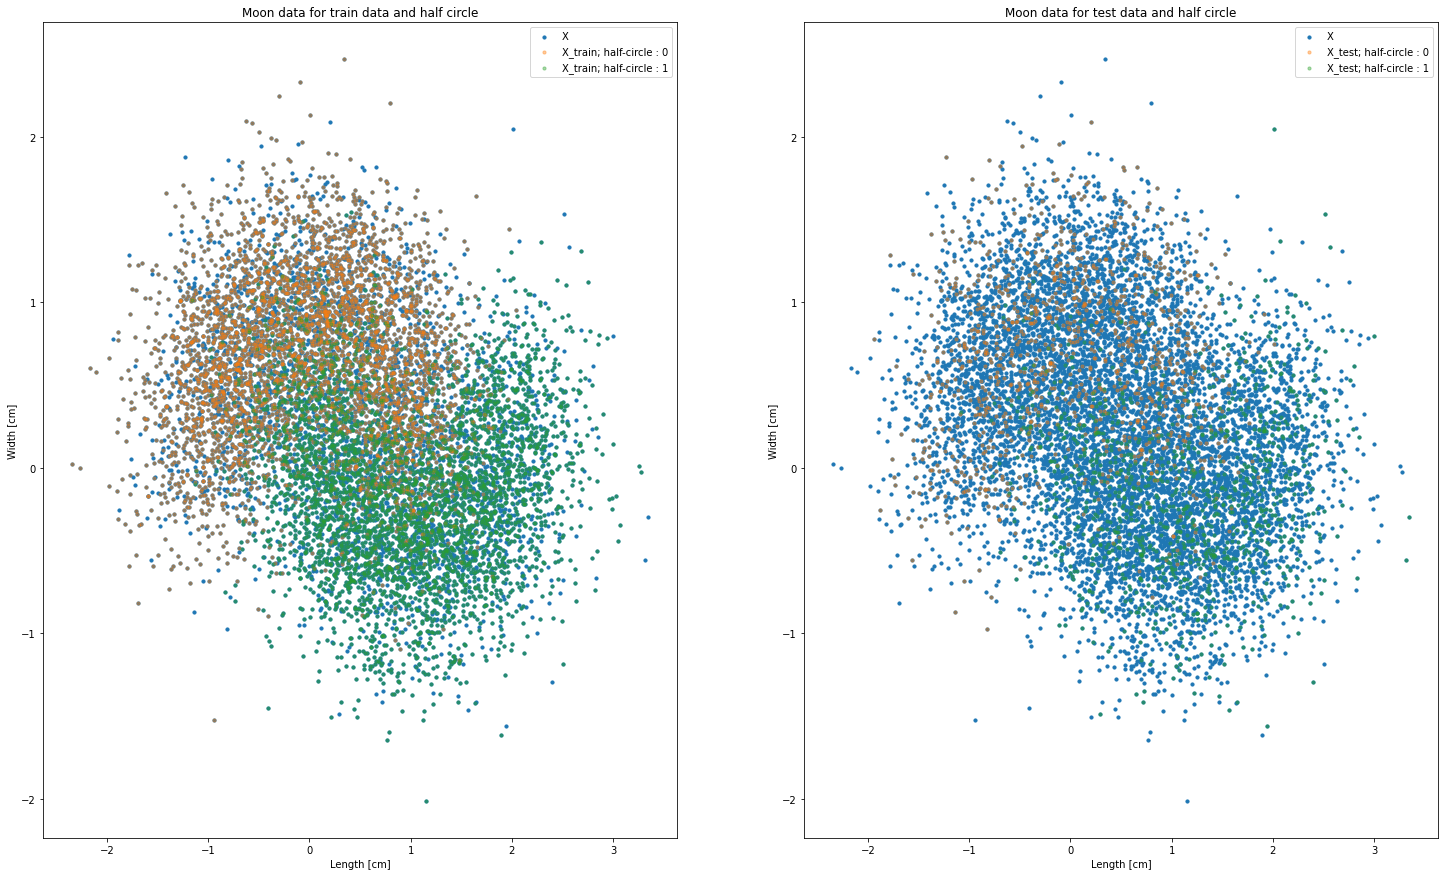

In [13]:
# Scatter the moon data and don't forget to add a legend to your figure
import matplotlib.pyplot as plt

fig, (plt1,plt2) = plt.subplots(1,2,figsize=(25,15))

plt1.scatter(X[:, 0], X[:, 1],s=10,label='X')
plt2.scatter(X[:, 0], X[:, 1],s=10,label='X')

plt1.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1],s=10,alpha = 0.4,label='X_train; half-circle : 0')
plt1.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1],s=10,alpha = 0.4,label='X_train; half-circle : 1')

plt2.scatter(X_test[y_test==0,0], X_test[y_test==0,1],s=10,alpha = 0.4,label='X_test; half-circle : 0')
plt2.scatter(X_test[y_test==1,0], X_test[y_test==1,1],s=10,alpha = 0.4,label='X_test; half-circle : 1')

plt1.legend()
plt2.legend()

# Set figure title and axis labels
plt1.set_title('Moon data for train data and half circle')
plt1.set_xlabel("Length [cm]")
plt1.set_ylabel("Width [cm]")
plt2.set_title('Moon data for test data and half circle')
plt2.set_xlabel("Length [cm]")
plt2.set_ylabel("Width [cm]")

Do your data & training/test splits look reasonable?

**Q3) Conduct a hyperparameter search to find the two hyperparameters that lead to the best-performing decision tree**

Hint 1: You can conduct an exhaustive hyperparameter search over specified parameter values using the `GridSearchCV` class documented [at this link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). We recommend using cross-validation by setting the parameter `cv`.

Hint 2: If you choose to train a [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) object, we recommmend conducting the search over the `max_leaf_nodes` and `min_samples_split` hyperparameters. Consult the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to decide which range to search over.

<a name="Q3"></a>

In [11]:
# Import the necessary classes and functions

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
# Conduct the grid search to find good hyperparameter values 
# for your decision tree
parameters = {'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10], 'max_leaf_nodes':[5,10,15,20,25,30,35,40,45,50]}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, parameters,cv=5)
clf.fit(X_train,y_train)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_leaf_nodes',
 'param_min_samples_leaf',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [14]:
# Print the best values you found for the hyperparameters
# using the `best_estimator_` attribute of your grid search object

clf.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=30, min_samples_leaf=5)

**Q4) Using the best hyperparameter values you found, train a decision tree over the entire training set and calculate its accuracy over both the training and test sets**

Hint 1: [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) has a method `predict` that automatically selects the best model found during the search.

Hint 2: Using the [accuracy classification score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), you should find an accuracy of $\approx$85% on the test set.

In [15]:
# Make predictions on the training and test sets with your best model

x_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)


In [16]:
# Calculate the accuracy of the best model over the training and test sets
from sklearn.metrics import accuracy_score
accuracy_score(x_pred,y_train)*100, accuracy_score(y_pred,y_test)*100

(86.6875, 86.9)

**Q5) Visualize the errors made by your best model**

Hint: You may recycle the visualization scripts you developed in [Question 2](#Q2)

Text(0, 0.5, 'Width [cm]')

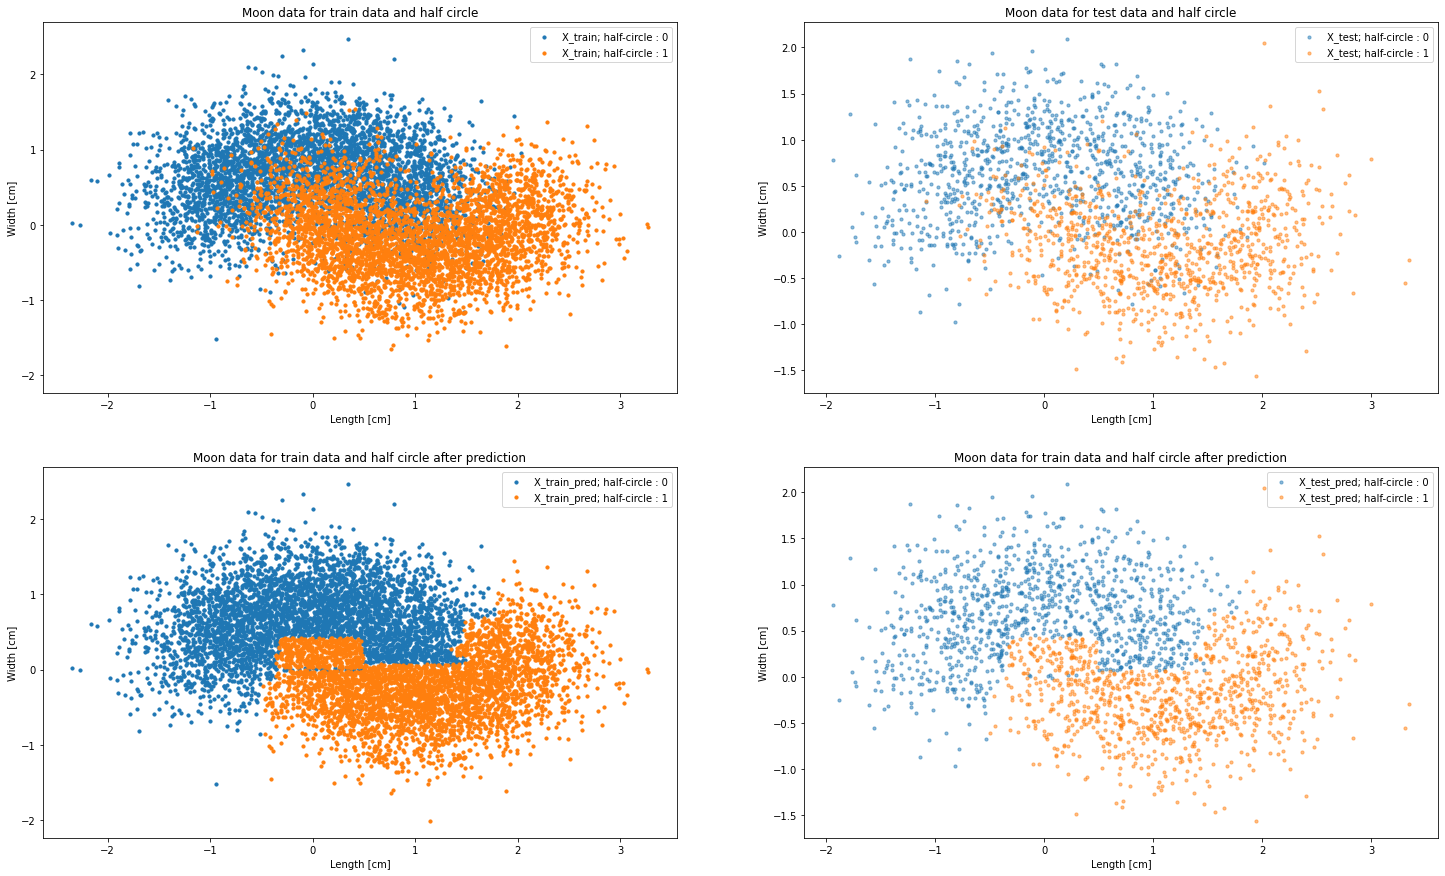

In [17]:
# Scatter points for which your best model made erroneous predictions
# and compare them to points for which your best models made correct predictions

fig, ((plt1,plt2),(plt3,plt4)) = plt.subplots(2,2,figsize=(25,15))

plt1.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1],s=10,label='X_train; half-circle : 0')
plt1.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1],s=10,label='X_train; half-circle : 1')

plt2.scatter(X_test[y_test==0,0], X_test[y_test==0,1],s=10,alpha=0.5,label='X_test; half-circle : 0')
plt2.scatter(X_test[y_test==1,0], X_test[y_test==1,1],s=10,alpha=0.5,label='X_test; half-circle : 1')

plt3.scatter(X_train[x_pred==0, 0], X_train[x_pred==0, 1],s=10,label='X_train_pred; half-circle : 0')
plt3.scatter(X_train[x_pred==1, 0], X_train[x_pred==1, 1],s=10,label='X_train_pred; half-circle : 1')

plt4.scatter(X_test[y_pred==0,0], X_test[y_pred==0,1],s=10,alpha=0.5,label='X_test_pred; half-circle : 0')
plt4.scatter(X_test[y_pred==1,0], X_test[y_pred==1,1],s=10,alpha=0.5,label='X_test_pred; half-circle : 1')

plt1.legend()
plt2.legend()
plt3.legend()
plt4.legend()

# Set figure title and axis labels
plt1.set_title('Moon data for train data and half circle')
plt1.set_xlabel("Length [cm]")
plt1.set_ylabel("Width [cm]")
plt2.set_title('Moon data for test data and half circle')
plt2.set_xlabel("Length [cm]")
plt2.set_ylabel("Width [cm]")
plt3.set_title('Moon data for train data and half circle after prediction')
plt3.set_xlabel("Length [cm]")
plt3.set_ylabel("Width [cm]")
plt4.set_title('Moon data for train data and half circle after prediction')
plt4.set_xlabel("Length [cm]")
plt4.set_ylabel("Width [cm]")

Can you think of ways to improve your best model?

# Bonus Exercise 2: Upgrading the Decision Tree to a Random Forest

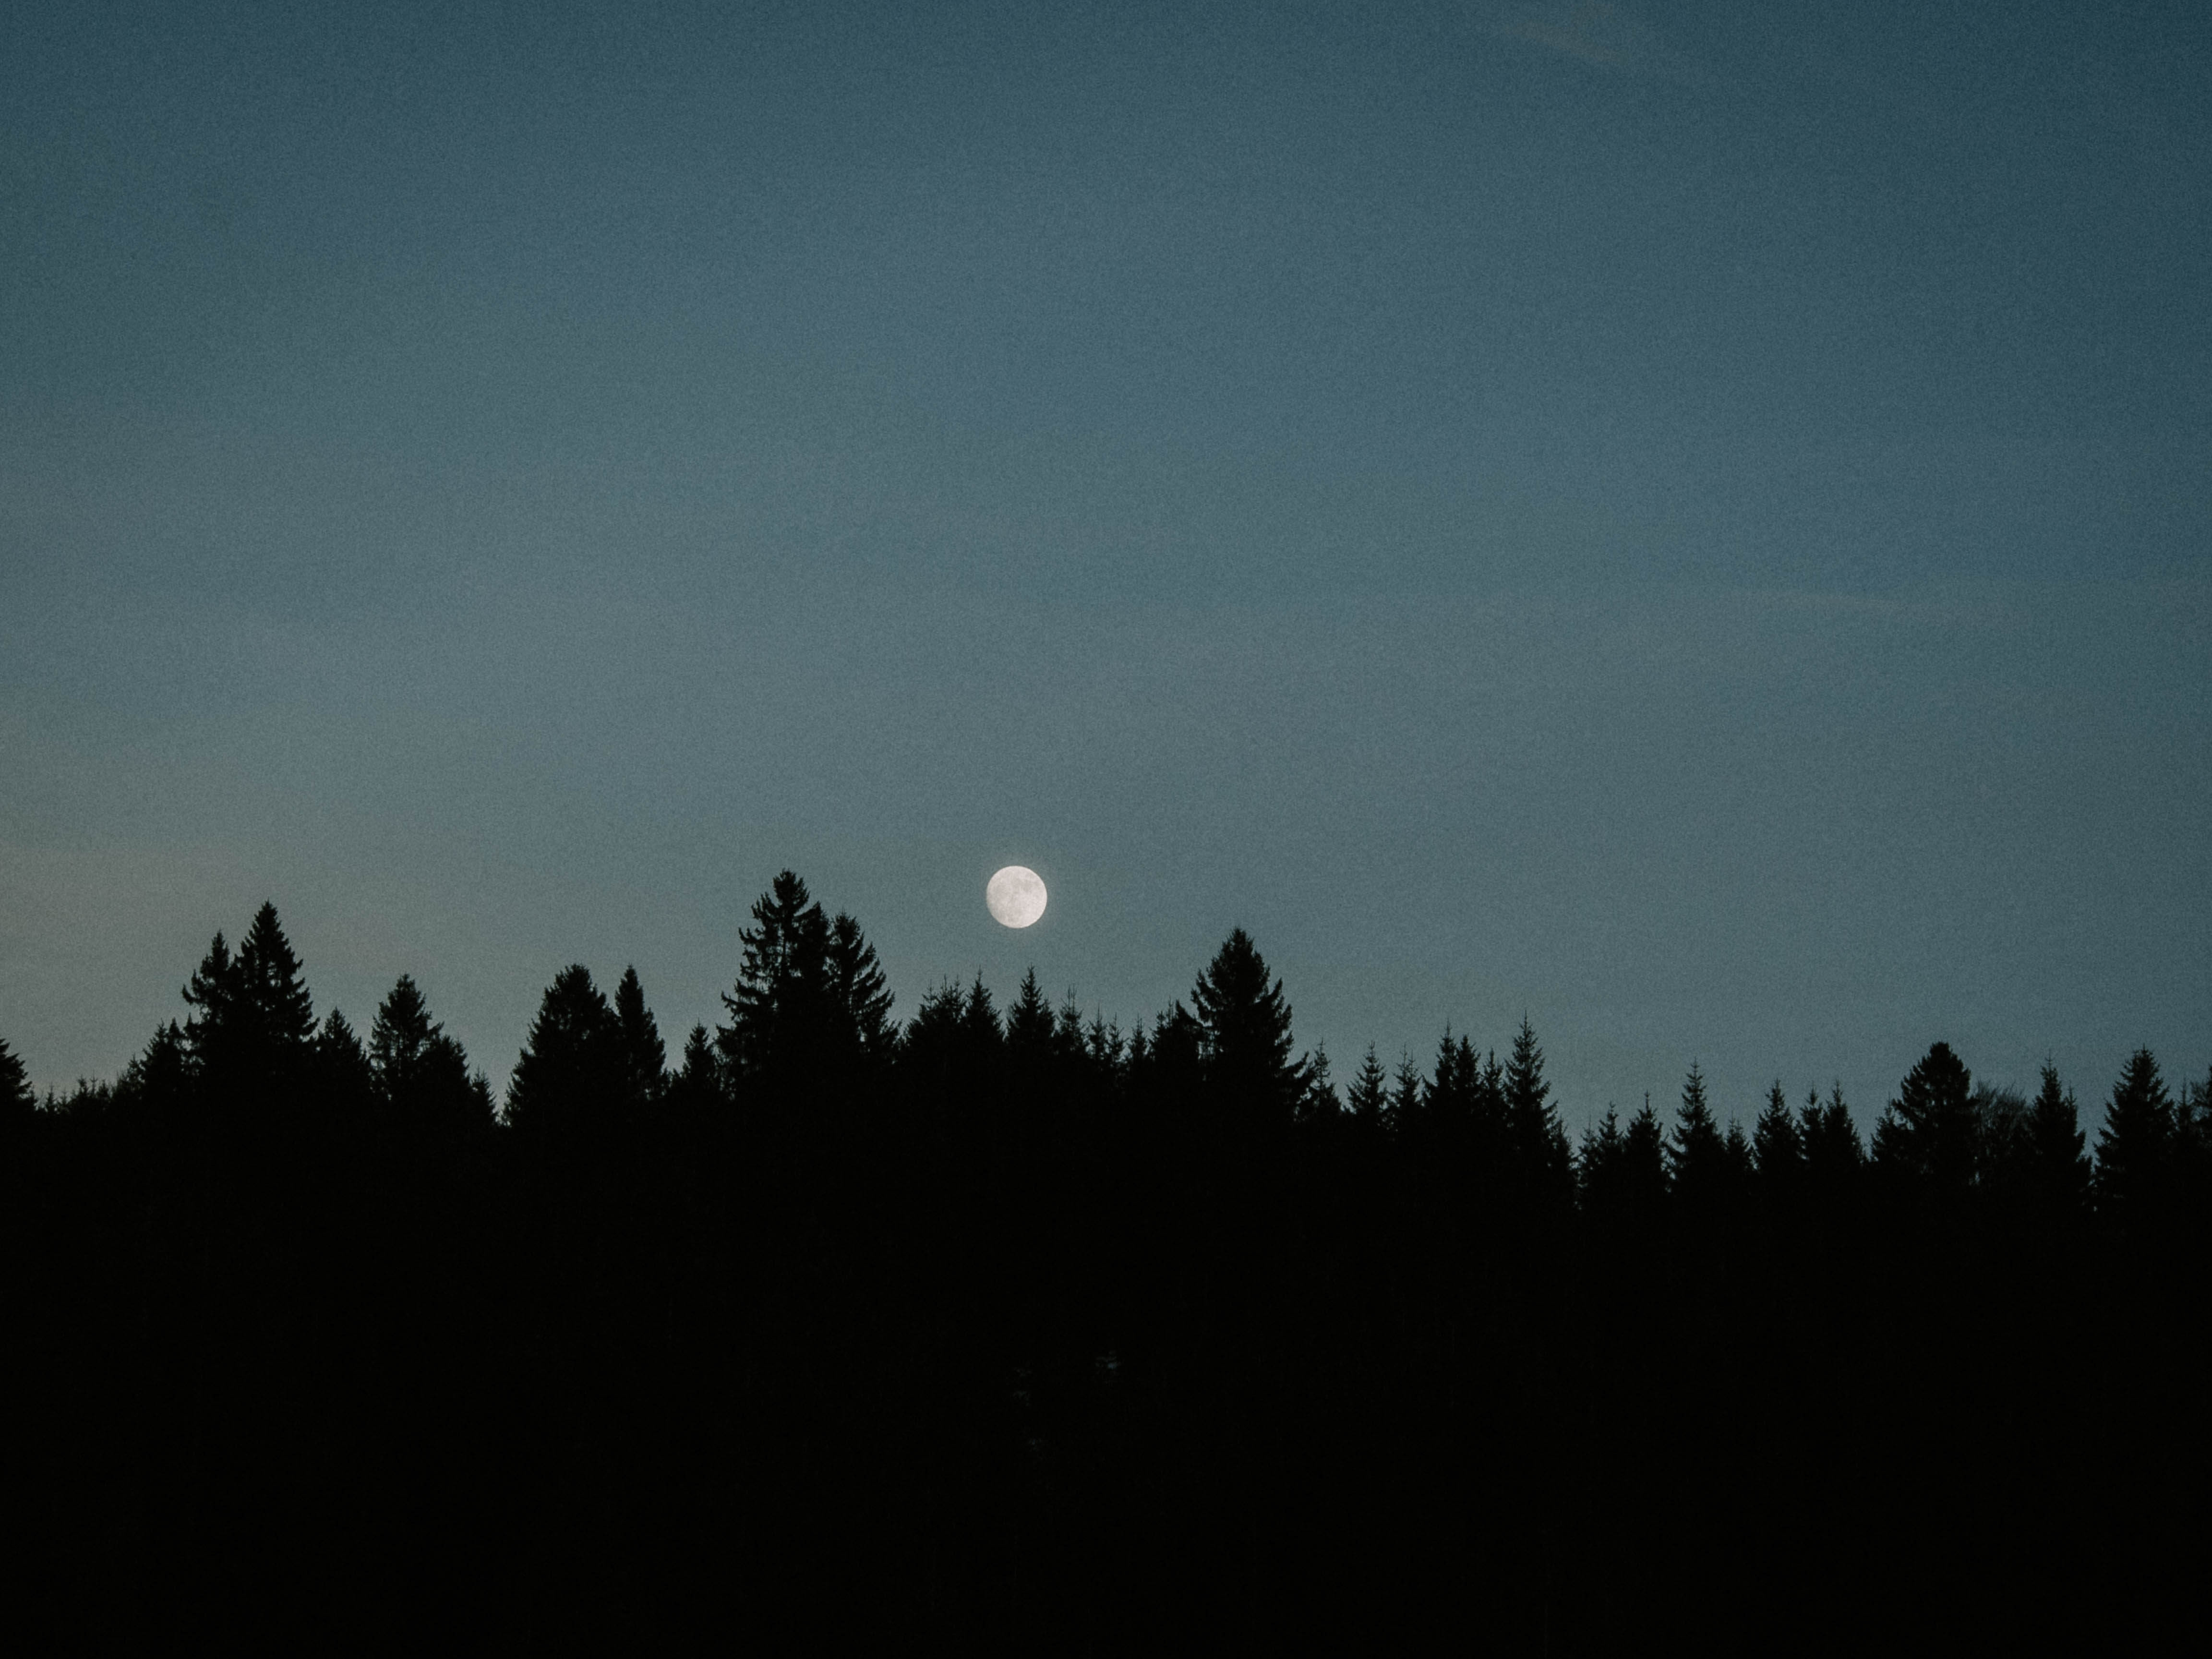

Is a full forest enough to predict the moon? 🌲

Building on the previous exercise, we would like to upgrade the decision tree to a random forest to make more accurate predictions on the `moons` dataset.

**Q1) Generate 1,000 subsets of the training set, each containing 100 instances selected randomly**

Hint: You may use `scikit-learn`'s random permutation cross-validator [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) with the appropriate value of the  `n_splits` parameter.

In [ ]:
# Import and build the random permutation cross-validator

In [ ]:
# Generate 1,000 subsets of the training sets with 
# 100 randomly-selected instances

**Q2) Train one [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on each subset, using the best hyperparameter values found [above](#Q3)**

In [ ]:
# Train one decision tree per subset

**Q3) Evaluate each decision tree on the test set and visualize their accuracy**

Hint 1: You can quickly make histograms by using `Matplotlib.pyplot`'s [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function

Hint 2: The mean accuracy of your decision trees should be approximately 80% because the decision trees are fitted on smaller sets. 

In [ ]:
# Train one decision tree on each subset

In [ ]:
# Calculate the mean accuracy

In [ ]:
# Visualize the distribution of accuracies

Now comes the magic ❇ 🌲 ❇ 

**Q4) Generate the predictions of the 1,000 decision trees over the test set, and only keep the most frequent prediction. This gives you *majority-vote predictions* over the test set**

Hint: You may use `Scipy`'s [`mode`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) function to calculate the most frequent prediction.

In [ ]:
# Generate the predictions of all trained decision trees over the test set

In [ ]:
# For each instance of the test set, calculate the majority-vote prediction

Congratulations!! 😃 You have created a random forest classifier 🌲 🌳 🌲

**Q5) Calculate the accuracy of your random forest classifier and visualize its performance**

Hint: Your accuracy should be approximately 1% higher than your best decision tree. 

In [ ]:
# Calculate the accuracy of your random forest classifier

In [ ]:
# Visualize its errors: Which points did the
# random forest classify correctly 
# when the decision tree was making an error?